In [1]:
from dotenv import load_dotenv
import datetime
import sys
import pandas as pd
from bls_gov.BlsGov import BlsGov
from bls_gov.BlsGovGetSeriesDescription import BlsGovGetSeriesDescription

In [2]:
today = datetime.date.today()
year = today.year

In [3]:
bls_gov = BlsGov()

In [4]:
df = bls_gov.get_data_as_pandas_df('LNU02000000', '2010', '2019')

In [5]:
df.head()

,value,footnotes,date
119,136809,"[{'code': '1', 'text': 'Data affected by chang...",2010-01-01
118,137203,[{}],2010-02-01
117,137983,[{}],2010-03-01
116,139302,[{}],2010-04-01
115,139497,[{}],2010-05-01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 119 to 0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   value      120 non-null    int64         
 1   footnotes  120 non-null    object        
 2   date       120 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.8+ KB


In [7]:
df['value'] = pd.to_numeric(df['value'])

In [8]:
df = df.rename(columns={"periodName": "month"})

In [9]:
df['day'] = 1

In [10]:
df.head()

,value,footnotes,date,day
119,136809,"[{'code': '1', 'text': 'Data affected by chang...",2010-01-01,1
118,137203,[{}],2010-02-01,1
117,137983,[{}],2010-03-01,1
116,139302,[{}],2010-04-01,1
115,139497,[{}],2010-05-01,1


In [11]:
df['merged'] = df['year'] + '-' + df['month'] + '-' + df['day'].astype(str)

KeyError: 'year'

In [ ]:
df.head()

In [ ]:
df['date'] = pd.to_datetime(df['merged'], format='%Y-%B-%d')

In [ ]:
df.head()

In [ ]:
df.plot(x="date", y='value')

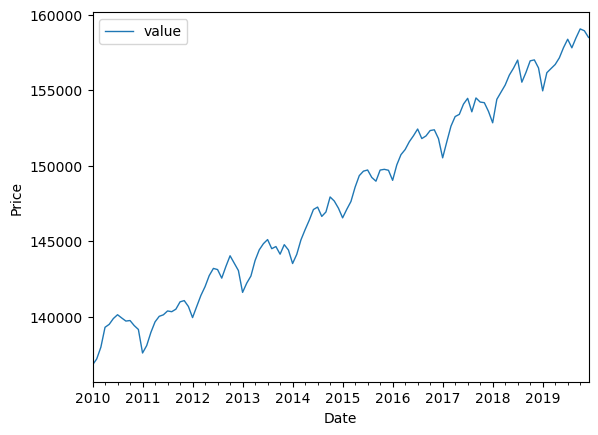

,value,footnotes,date
119,136809,"[{'code': '1', 'text': 'Data affected by chang...",2010-01-01
118,137203,[{}],2010-02-01
117,137983,[{}],2010-03-01
116,139302,[{}],2010-04-01
115,139497,[{}],2010-05-01
...,...,...,...
4,157816,[{}],2019-08-01
3,158478,[{}],2019-09-01
2,159067,[{}],2019-10-01
1,158945,[{}],2019-11-01


In [12]:
bls_gov.plot_series_id('LNU02000000', '2010', '2019')